# Downloading Dataset from Github

In [0]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Counting objects: 163141, done.
remote: Total 163141 (delta 0), reused 0 (delta 0), pack-reused 163141
Receiving objects: 100% (163141/163141), 1.99 GiB | 44.89 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Checking out files: 100% (163100/163100), done.


# Train Data Split

In [0]:
import os
import random
from shutil import copyfile
source_path = "PlantVillage-Dataset/raw/color"
target_path = "dataset"

In [40]:
# create target folder
if not os.path.isdir(target_path):
  os.makedirs(target_path)
  print(target_path+" is created")

# creating folder structure
if not os.path.isdir(target_path+"/train"):
  os.makedirs(target_path+"/train")
  print(target_path+"/train is created")
if not os.path.isdir(target_path+"/test"):
  os.makedirs(target_path+"/test")
  print(target_path+"/test is created")
if not os.path.isdir(target_path+"/valid"):
  os.makedirs(target_path+"/valid")
  print(target_path+"/valid is created")

dataset/train is created
dataset/test is created
dataset/valid is created


In [41]:
# split files into train, valid and test
data_count = 0
train_count = 0
test_count = 0
valid_count = 0
for class_name in os.listdir(source_path):
  train_class = target_path+"/train/"+ class_name
  test_class = target_path+"/test/"+ class_name
  valid_class = target_path+"/valid/"+ class_name
  # class folder creation
  if not os.path.isdir(train_class):
    os.makedirs(train_class)
    print(train_class+" is created..")
  if not os.path.isdir(test_class):
    os.makedirs(test_class)
    print(test_class+" is created..")
  if not os.path.isdir(valid_class):
    os.makedirs(valid_class)
    print(valid_class+" is created..")
  
  # file spliting
  for file in os.listdir(source_path+"/"+class_name):
    choice = random.randint(1,100)
    data_count = data_count + 1
    src_file = source_path+"/"+class_name+"/"+file
    if choice < 70:
      dst_file = train_class+"/"+file
      copyfile(src_file,dst_file)
      train_count = train_count + 1
    elif choice < 90 :
      dst_file = valid_class+"/"+file
      copyfile(src_file,dst_file)
      valid_count = valid_count + 1
    else:
      dst_file = test_class+"/"+file
      copyfile(src_file,dst_file)
      test_count = test_count + 1
    

dataset/train/Corn_(maize)___Northern_Leaf_Blight is created..
dataset/test/Corn_(maize)___Northern_Leaf_Blight is created..
dataset/valid/Corn_(maize)___Northern_Leaf_Blight is created..
dataset/train/Raspberry___healthy is created..
dataset/test/Raspberry___healthy is created..
dataset/valid/Raspberry___healthy is created..
dataset/train/Tomato___Spider_mites Two-spotted_spider_mite is created..
dataset/test/Tomato___Spider_mites Two-spotted_spider_mite is created..
dataset/valid/Tomato___Spider_mites Two-spotted_spider_mite is created..
dataset/train/Strawberry___healthy is created..
dataset/test/Strawberry___healthy is created..
dataset/valid/Strawberry___healthy is created..
dataset/train/Apple___Black_rot is created..
dataset/test/Apple___Black_rot is created..
dataset/valid/Apple___Black_rot is created..
dataset/train/Pepper,_bell___healthy is created..
dataset/test/Pepper,_bell___healthy is created..
dataset/valid/Pepper,_bell___healthy is created..
dataset/train/Cherry_(includ

In [47]:
print("---------------------Summary---------------------")
print("Train Data set: ")
print("Total Classes : "+str(len(os.listdir(target_path+"/train"))))
print("Data count    : "+str(train_count))
print("\n")

print("Valid Data set: ")
print("Total Classes : "+str(len(os.listdir(target_path+"/valid"))))
print("Data count    : "+str(valid_count))
print("\n")

print("Test Data set: ")
print("Total Classes : "+str(len(os.listdir(target_path+"/test"))))
print("Data count    : "+str(test_count))
print("\n")

---------------------Summary---------------------
Train Data set: 
Total Classes : 38
Data count    : 37366


Valid Data set: 
Total Classes : 38
Data count    : 10978


Test Data set: 
Total Classes : 38
Data count    : 5961




# ResNet50

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
# load model with top layer
model = ResNet50(weights='imagenet')

In [20]:
# view the model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

('Predicted:', [(u'n02504458', u'African_elephant', 0.5322475), (u'n01871265', u'tusker', 0.45342302), (u'n02504013', u'Indian_elephant', 0.0065282825)])


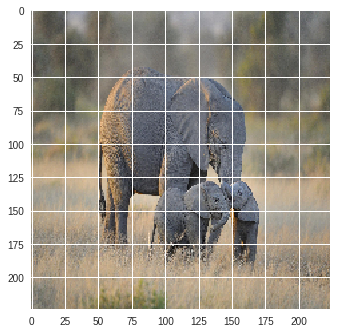

In [11]:
# input image
img_path = 'imageNet/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# plt the input
plt.imshow(img)
plt.title("Input Image")

# pre processing
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [16]:
# prediction
preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
for id in decode_predictions(preds, top=3)[0]:
  print (id[1]+'----'+str(id[2]))

African_elephant----0.5322475
tusker----0.45342302
Indian_elephant----0.0065282825


In [18]:
# Load model without top layer
resnet50_tl = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94666752/94653016 [==============================] - 1s 0us/step


In [21]:
# view model
resnet50_tl.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# to perform transfer learning
from keras import models
from keras import layers
from keras import optimizers

In [25]:
# Freeze all layers
for layer in resnet50_tl.layers:
    layer.trainable = False

# Create the model
resnet50 = models.Sequential()

# Add pretrained ResNet50 model
resnet50.add(resnet50_tl)

# Adding new layers
resnet50.add(layers.Flatten())
resnet50.add(layers.Dense(1024, activation='relu'))
resnet50.add(layers.Dense(512, activation='relu'))
resnet50.add(layers.Dense(37, activation='softmax'))

# view the model
resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 37)                18981     
Total params: 26,229,669
Trainable params: 2,641,957
Non-trainable params: 23,587,712
_________________________________________________________________
